# Exploratory Data Analysis

The main objectives for this notebook are:
- Display distributions (univariate analysis)
- Investigate the relationships between variables
- Highlight insights that show benefits for music listeners
- Go through the next steps that will be used in feature engineering and machine learning

In [136]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [137]:
df = pd.read_csv('../data/Data - MHxM cleaned.csv')
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
1,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
2,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
3,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve
4,21.0,Spotify,1.0,1,0,0,K pop,1,1,95.0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,17.0,Spotify,2.0,1,1,0,Rock,1,1,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,Improve
678,18.0,Spotify,1.0,1,1,0,Pop,1,1,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,Improve
679,19.0,Others,6.0,1,0,1,Rap,1,0,120.0,...,2,2,2,1,1,2.0,2.0,2.0,2.0,Improve
680,19.0,Spotify,5.0,1,1,0,Classical,0,0,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,Improve


In [138]:
df.shape

(682, 31)

In [139]:
df.info

<bound method DataFrame.info of       Age Primary streaming service  Hours per day  While working  \
0    18.0                   Spotify            4.0              0   
1    18.0                   Spotify            4.0              1   
2    18.0                   Spotify            5.0              1   
3    18.0             YouTube Music            3.0              1   
4    21.0                   Spotify            1.0              1   
..    ...                       ...            ...            ...   
677  17.0                   Spotify            2.0              1   
678  18.0                   Spotify            1.0              1   
679  19.0                    Others            6.0              1   
680  19.0                   Spotify            5.0              1   
681  29.0             YouTube Music            2.0              1   

     Instrumentalist  Composer         Fav genre  Exploratory  \
0                  0         0  Video game music            0   
1        

In [140]:
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

In [141]:
# Predefine column groupings
genre_freq_list = list(df.columns)[10:26]
mental_health_list = list(df.columns)[26:30]

In [142]:
# df.info()

In [143]:
# Predefine figsize
figsize1_1 = (6, 3)
figsize1_2 = (16, 4)
figsize2_2 = (16, 8)

# Seeing general distributions

## Histograms of age, hours listening, BPM

Text(0.5, 1.0, 'BPM of music')

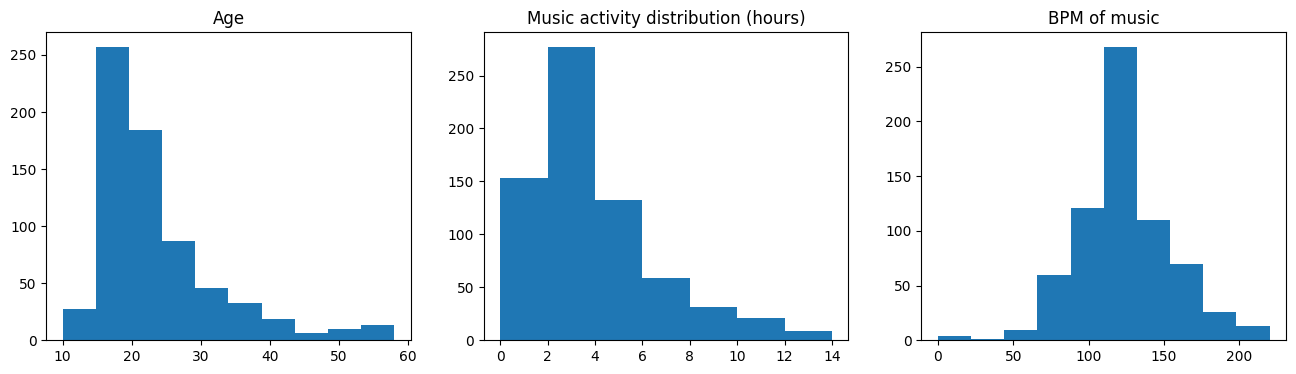

In [144]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3,figsize=figsize1_2)

ax0.hist(df['Age'])
ax0.set_title('Age')

ax1.hist(df['Hours per day'], bins=7)
ax1.set_title('Music activity distribution (hours)')

ax2.hist(df['BPM'])
ax2.set_title('BPM of music')

### Insights
- Most participants are around 15 to 25 years of age.
- 2 to 4 hours a day is the largest group of listening activity.
- The kind of music they listen to typically has 100-150 BPM.


## Bar plots of streaming provider, while working, instrumentalist, composer, and exploratory

<Axes: xlabel='Primary streaming service', ylabel='count'>

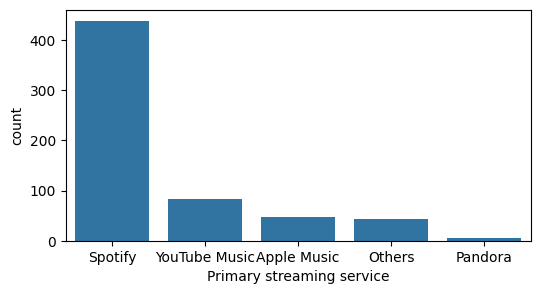

In [145]:
fig4, ax0 = plt.subplots(figsize=figsize1_1)
sns.countplot(x='Primary streaming service', data=df)

### Insights
- Majority of the participants use Spotify to listen to music.

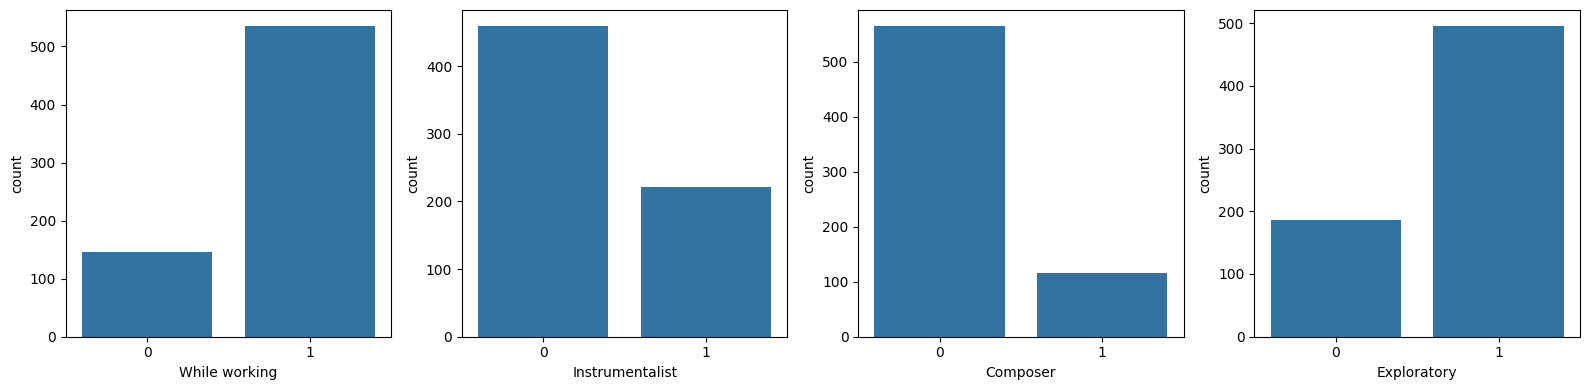

In [146]:
fig, axs = plt.subplots(1, 4, figsize=figsize1_2)
axs = axs.flatten()

misc_list = list(['While working', 'Instrumentalist', 'Composer', 'Exploratory'])

for i, column in enumerate(misc_list):
    sns.countplot(x=column, data=df, ax=axs[i])

plt.tight_layout()
plt.subplots_adjust(hspace=.2)

### Insights
- More people are listening to music while working than those who are not. 
- The majority of the participants cannot play instruments and do not compose music. 
- Also, the participants are more exploratory than just sticking to familiar music. 

## Listening by genre

Fav genre
Rock                168
Pop                 112
Metal                87
Classical            48
Video game music     42
Hip hop              34
EDM                  33
R&B                  33
Folk                 29
Country              23
K pop                21
Rap                  20
Jazz                 18
Lofi                 10
Gospel                2
Latin                 2
dtype: int64


Text(0.5, 1.0, 'Favorite genres')

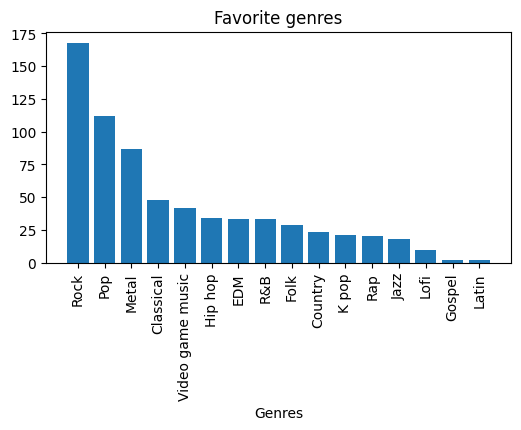

In [147]:
df_by_fave = df.groupby('Fav genre').size().sort_values(ascending=False)
print(df_by_fave)

fig2, ax0 = plt.subplots(figsize=figsize1_1)
ax0.bar(df_by_fave.index, df_by_fave)

ax0.set_xlabel('Genres')
ax0.tick_params('x', rotation=90)
ax0.set_title('Favorite genres')

### Insights
- Rock, Pop, and Metal were the gross favorites among the participants. Meanwhile, the genres with people least liking it the most were Lofi, Gospel, and Latin.

### Note
We've turned the ordinal listening frequency data into numerical values, such that:
- Never = 0
- Rarely = 1
- Sometimes = 2
- Very frequently = 3

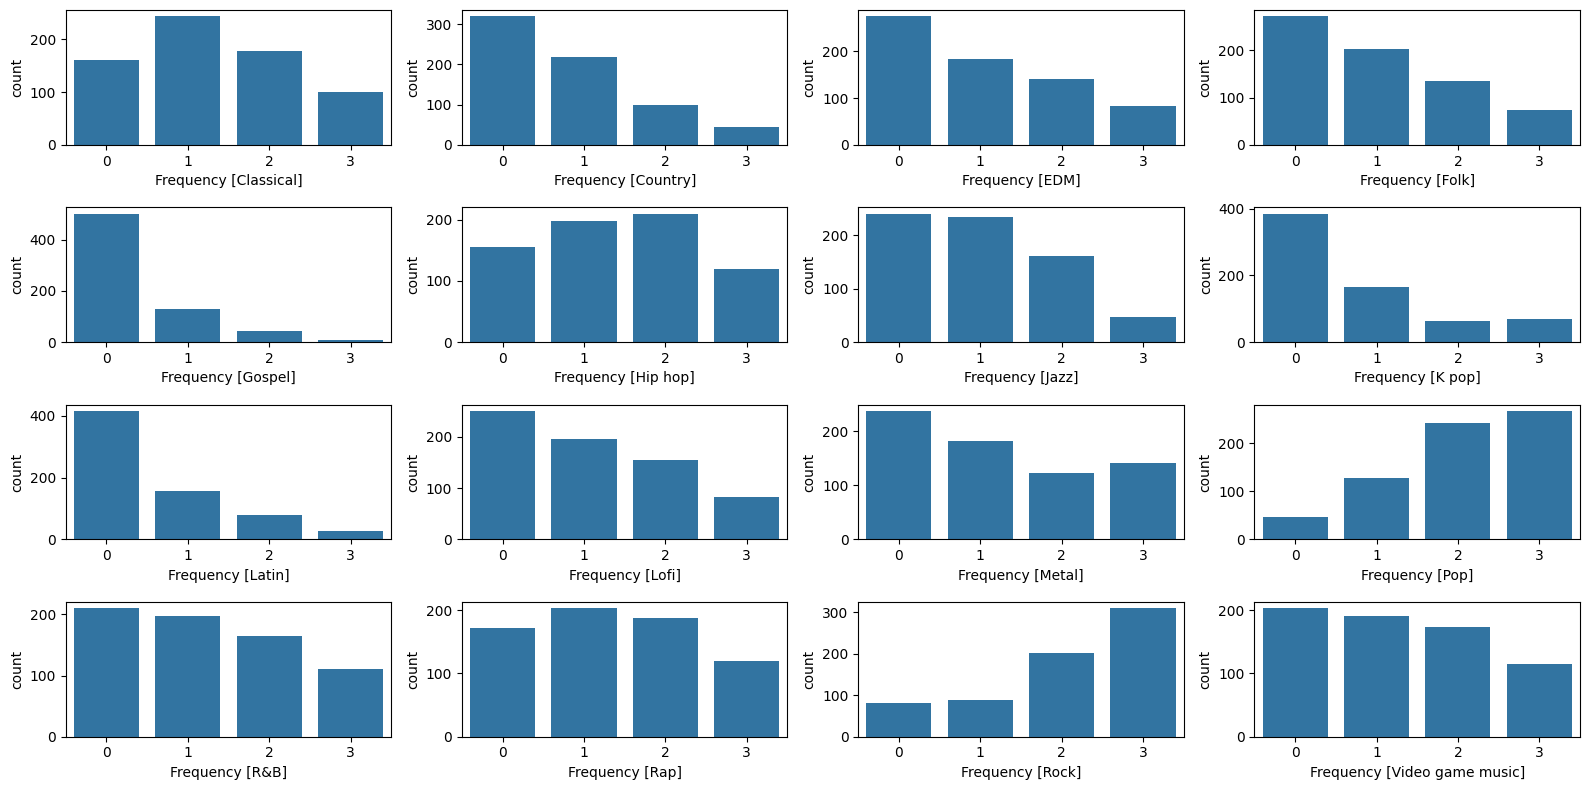

In [148]:
fig, axs = plt.subplots(4, 4, figsize=figsize2_2)
axs = axs.flatten()

for i, column in enumerate(genre_freq_list):
    # axs[i].set_title(f'{column}')
    sns.countplot(x=column, data=df, ax=axs[i])
    

plt.tight_layout()
# plt.subplots_adjust(hspace=.2)

### Insights
- Similar to the favorites trend, Rock and Pop music have the most frequent listeners, while Metal does not have the same trend as the other two. 
- Some of the genres most people never listen to are: Gospel, Latin, K-pop, Country, Folk, and EDM (in that apparent order).
- Incorporating the previous insight, while Lofi is not exactly a favorite of many people, is still listened to by a majority.

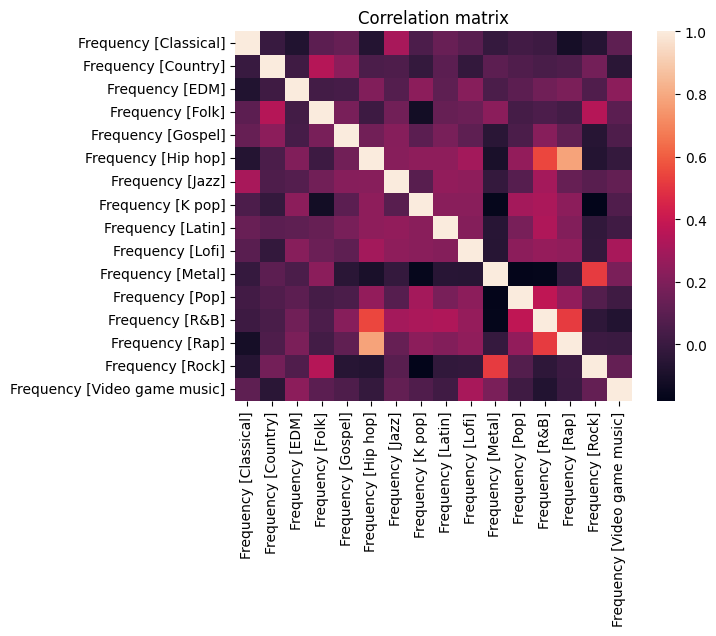

In [149]:
correl_data = df[genre_freq_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()  

sns.heatmap(correl_matrix)
plt.title('Correlation matrix')
plt.show()

### Correlations
Among the notable observations are the moderate positive relationships between:
1. R&B and Hip hop ($r=0.55$)
2. Rap and Hip hop ($r=0.78$)
3. Rap and R&B ($r=0.52$)
4. Metal and Rock ($r=0.52$)

R&B, Rap, and Hip hop are indeed very adjacent in terms of roots and sound, as well as Metal and Rock.

# Restructuring the dataframe

#### Adding `Generation` feature would be helpful in presenting the data, so that we can present them in generational brackets instead of having it continuous.

In [150]:
# Define separation and labels
gen_bins = [10, 25, 41, 57, 76]
gen_labels = ['Gen Z', 'Millenials', 'Gen X', 'Boomers']

df['Generation'] = pd.cut(df['Age'], bins=gen_bins, labels=gen_labels)

# Add id column before melting, then rename `index` as `id`
df.reset_index(inplace=True)
df.rename(columns = {'index':'id'}, inplace = True)
df

,id,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Generation
0,0,18.0,Spotify,4.0,0,0,0,Video game music,0,1,...,0,1,1,3,7.0,7.0,10.0,2.0,No effect,Gen Z
1,1,18.0,Spotify,4.0,1,0,0,R&B,1,0,...,3,3,0,1,7.0,2.0,5.0,9.0,Improve,Gen Z
2,2,18.0,Spotify,5.0,1,1,1,Jazz,1,1,...,3,3,3,0,8.0,8.0,7.0,7.0,Improve,Gen Z
3,3,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,...,1,0,0,2,4.0,8.0,6.0,0.0,Improve,Gen Z
4,4,21.0,Spotify,1.0,1,0,0,K pop,1,1,...,2,1,0,1,5.0,3.0,5.0,3.0,Improve,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,677,17.0,Spotify,2.0,1,1,0,Rock,1,1,...,0,1,3,0,7.0,6.0,0.0,9.0,Improve,Gen Z
678,678,18.0,Spotify,1.0,1,1,0,Pop,1,1,...,0,0,2,2,3.0,2.0,2.0,5.0,Improve,Gen Z
679,679,19.0,Others,6.0,1,0,1,Rap,1,0,...,2,2,1,1,2.0,2.0,2.0,2.0,Improve,Gen Z
680,680,19.0,Spotify,5.0,1,1,0,Classical,0,0,...,0,0,0,2,2.0,3.0,2.0,1.0,Improve,Gen Z


#### I want to start melting this dataframe based on genre-listening frequency, because we'll derive most of the insights based on the 'Very Frequent' entries. 

In [151]:
id_vars = list(df.columns)[:11] + list(df.columns)[27:]
melted_df = pd.melt(df, id_vars=id_vars, value_vars = genre_freq_list, var_name='Frequent Genre', value_name='Frequency', ignore_index=False)
melted_df.head()

,id,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Generation,Frequent Genre,Frequency
0,0,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,7.0,7.0,10.0,2.0,No effect,Gen Z,Frequency [Classical],0
1,1,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,7.0,2.0,5.0,9.0,Improve,Gen Z,Frequency [Classical],0
2,2,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,8.0,8.0,7.0,7.0,Improve,Gen Z,Frequency [Classical],1
3,3,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,4.0,8.0,6.0,0.0,Improve,Gen Z,Frequency [Classical],2
4,4,21.0,Spotify,1.0,1,0,0,K pop,1,1,95.0,5.0,3.0,5.0,3.0,Improve,Gen Z,Frequency [Classical],0


#### Now we'll rename the `Frequent Genre` column to only include the genre label.

In [152]:
genre_map = {
    'Frequency [Classical]': 'Classical',
    'Frequency [Country]': 'Country',
    'Frequency [EDM]': 'EDM',
    'Frequency [Folk]': 'Folk',
    'Frequency [Gospel]': 'Gospel',
    'Frequency [Hip hop]': 'Hip hop',
    'Frequency [Jazz]': 'Jazz',
    'Frequency [K pop]': 'K-pop',
    'Frequency [Latin]': 'Latin',
    'Frequency [Lofi]': 'Lofi',
    'Frequency [Metal]': 'Metal',
    'Frequency [Pop]': 'Pop',
    'Frequency [R&B]': 'R&B',
    'Frequency [Rap]': 'Rap',
    'Frequency [Rock]': 'Rock',
    'Frequency [Video game music]': 'Video game music'
}

mapped_df = melted_df.copy()
mapped_df['Frequent Genre'] = melted_df['Frequent Genre'].map(lambda x: genre_map.get(x, x))
mapped_df

,id,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Generation,Frequent Genre,Frequency
0,0,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,7.0,7.0,10.0,2.0,No effect,Gen Z,Classical,0
1,1,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,7.0,2.0,5.0,9.0,Improve,Gen Z,Classical,0
2,2,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,8.0,8.0,7.0,7.0,Improve,Gen Z,Classical,1
3,3,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,4.0,8.0,6.0,0.0,Improve,Gen Z,Classical,2
4,4,21.0,Spotify,1.0,1,0,0,K pop,1,1,95.0,5.0,3.0,5.0,3.0,Improve,Gen Z,Classical,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,677,17.0,Spotify,2.0,1,1,0,Rock,1,1,120.0,7.0,6.0,0.0,9.0,Improve,Gen Z,Video game music,0
678,678,18.0,Spotify,1.0,1,1,0,Pop,1,1,160.0,3.0,2.0,2.0,5.0,Improve,Gen Z,Video game music,2
679,679,19.0,Others,6.0,1,0,1,Rap,1,0,120.0,2.0,2.0,2.0,2.0,Improve,Gen Z,Video game music,1
680,680,19.0,Spotify,5.0,1,1,0,Classical,0,0,170.0,2.0,3.0,2.0,1.0,Improve,Gen Z,Video game music,2


#### We'll also subset on values that are equal to three: only the genres with very frequent listens.

In [153]:
subset_df = mapped_df[mapped_df['Frequency']==3]
subset_gen_genre_df = subset_df[['Generation', 'Frequent Genre', 'Frequency']]
# subset_gen_genre_df

# Genres most frequented per generation

C:\Users\Marco\AppData\Local\Temp\ipykernel_11032\1420630800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_count_series = generation_drop_duplicates.groupby('Generation').size()


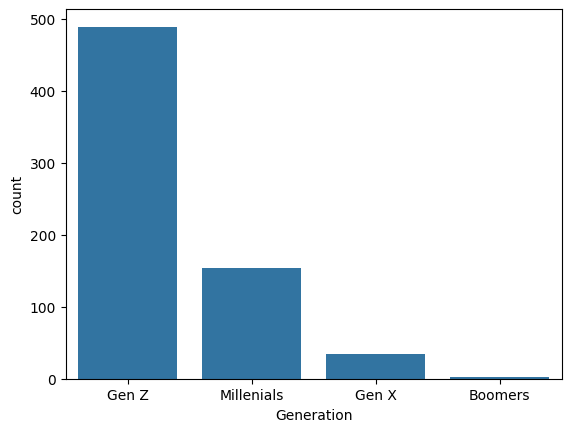

In [154]:
generation_drop_duplicates = df.drop_duplicates(subset=['id'], keep='last')
generation_drop_duplicates

sns.countplot(data=generation_drop_duplicates, x='Generation')

gen_count_series = generation_drop_duplicates.groupby('Generation').size()

### Insights
This provides us with another way of looking at the age distribution, in terms of generation.

C:\Users\Marco\AppData\Local\Temp\ipykernel_11032\3721768627.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gen_genre_pivoted_df = pd.pivot_table(subset_gen_genre_df, index='Generation', columns='Frequent Genre', values= 'Frequency', aggfunc='count')


Text(0.5, 1.0, 'Understanding Music Genre Preferences: Generation-wise Distribution (Normalized)')

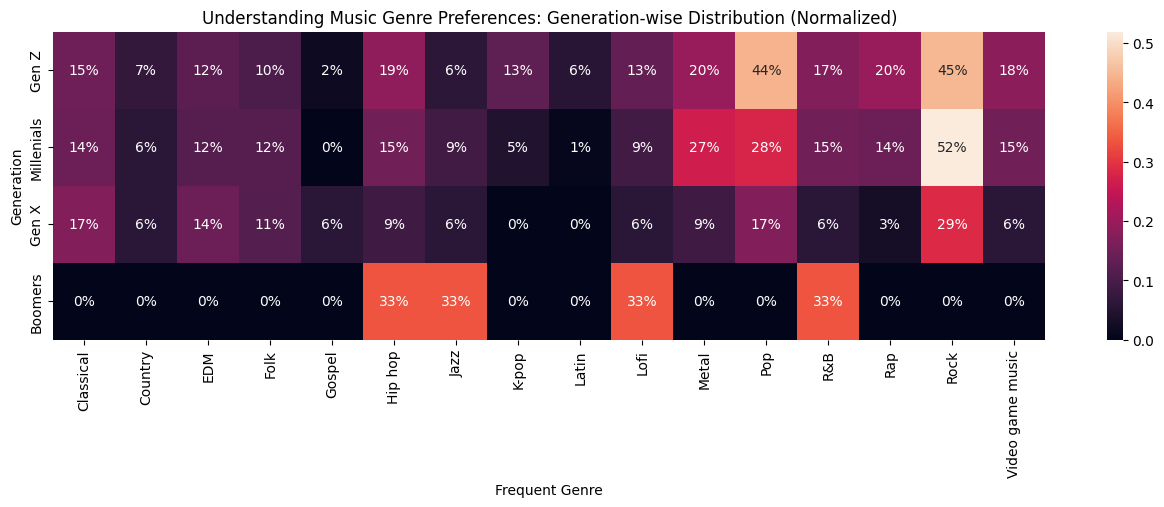

In [155]:
gen_genre_pivoted_df = pd.pivot_table(subset_gen_genre_df, index='Generation', columns='Frequent Genre', values= 'Frequency', aggfunc='count')
gen_genre_pivoted_df.apply(sorted, axis=1)
normalized_gen = gen_genre_pivoted_df.div(gen_count_series, axis=0)
normalized_gen
fig, ax0 = plt.subplots(figsize=figsize1_2)
sns.heatmap(normalized_gen, annot=True, fmt='.0%')
plt.title('Understanding Music Genre Preferences: Generation-wise Distribution (Normalized)')

### Insights
- Pop and Rock are the most listened-to genres by the Gen Z.
- Millenials tune to Rock music predominantly, with Pop and Metal following.
- Gen X participants listen to a lot of rock. 
- Because there's only three Boomers, their own preferences in Hip hop, Jazz, Lofi, and R&B easily takes the spotlight.
- Across generations, Gospel and Latin music are the least most-frequented by the participants.

# Mental Health

## Conditions correlation
Let's see how each mental health condition correlate with each other.

C:\Users\Marco\AppData\Local\Temp\ipykernel_11032\3042151751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_count_series = generation_drop_duplicates.groupby('Generation').size()


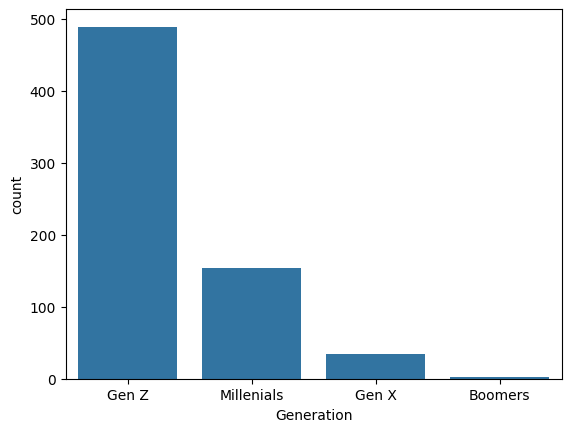

In [156]:
sns.countplot(data=generation_drop_duplicates, x='Generation')

gen_count_series = generation_drop_duplicates.groupby('Generation').size()

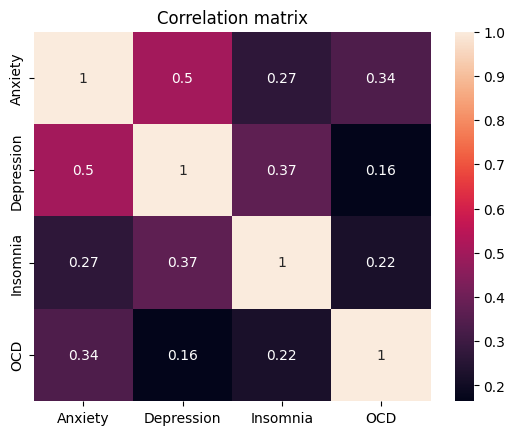

In [157]:
correl_data = df[mental_health_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots()

sns.heatmap(correl_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

### Correlation
- The highest correlation coefficient is a moderate positive correlation found between anxiety and depression ($r=0.5$). 
- There are also weak positive correlations between:
    1. Depression and insomnia ($r=0.37$),
    2. Anxiety and OCD ($r=0.34$), and
    3. Anxiety and insomnia ($r=0.27$).

## Music impact on genre enthusiasts with high levels of mental distress
Here I want to identify very frequently listened-to genres with positive and negative impact on listeners. We'll do that by creating subsets of `mapped_df` and checking whether each condition has a score of 7 or more, then choosing the genres with category 2 and 3 frequency. 

Text(0.5, 1.0, 'Music Influence on Genre Enthusiasts with High Anxiety Levels')

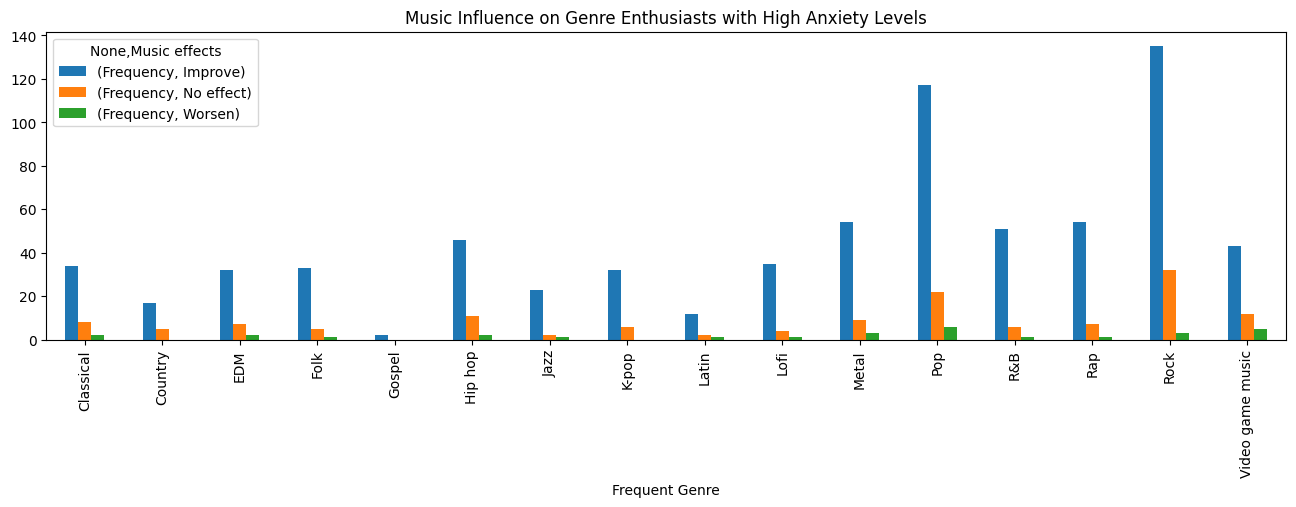

In [158]:
subset_anxiety_df = mapped_df[(mapped_df['Anxiety']>=7) & (mapped_df['Frequency']>=3)]

subset_depression_genre_df = subset_anxiety_df[['Music effects', 'Frequent Genre', 'Frequency']]

anxiety_genre_pivoted_df = pd.pivot_table(subset_depression_genre_df, index='Frequent Genre', columns='Music effects', aggfunc='count')

anxiety_genre_pivoted_df.plot(figsize=figsize1_2, kind='bar')
plt.title("Music Influence on Genre Enthusiasts with High Anxiety Levels")

### Insights on Anxiety
- The anxiety-experiencing participants have reported emotional improvement and have been frequently 

### Insights 

Text(0.5, 1.0, 'Music Influence on Genre Enthusiasts with High Depression Levels')

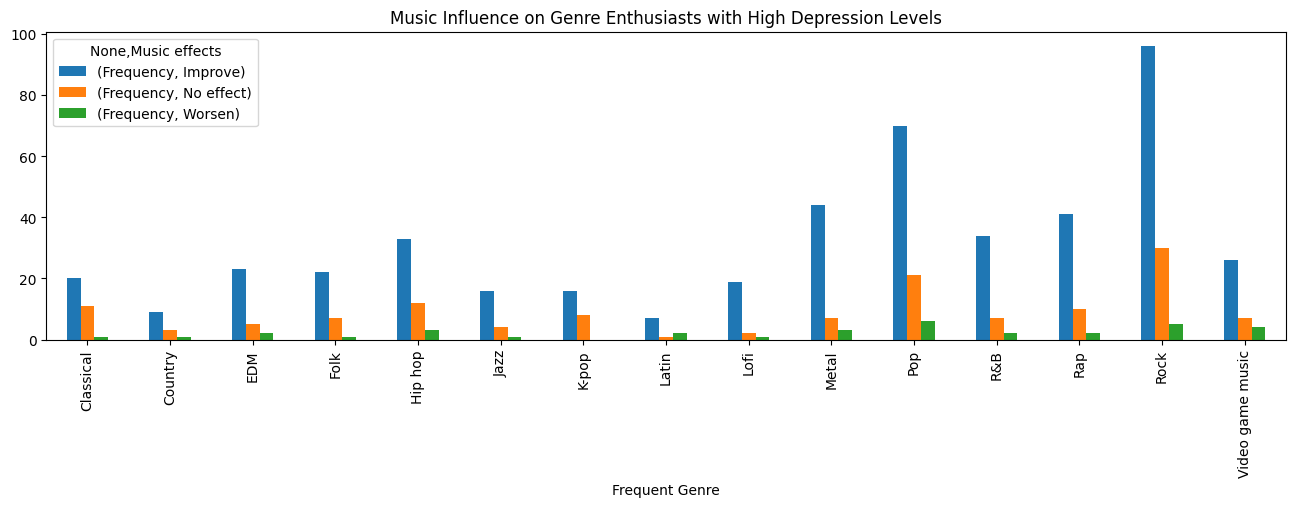

In [159]:
subset_depression_df = mapped_df[(mapped_df['Depression']>=7) & (mapped_df['Frequency']>=3)]

subset_depression_genre_df = subset_depression_df[['Music effects', 'Frequent Genre', 'Frequency']]

depression_genre_pivoted_df = pd.pivot_table(subset_depression_genre_df, index='Frequent Genre', columns='Music effects', aggfunc='count')

depression_genre_pivoted_df.plot(figsize=figsize1_2, kind='bar')
plt.title("Music Influence on Genre Enthusiasts with High Depression Levels")

Text(0.5, 1.0, 'Music Influence on Genre Enthusiasts with High Insomnia Levels')

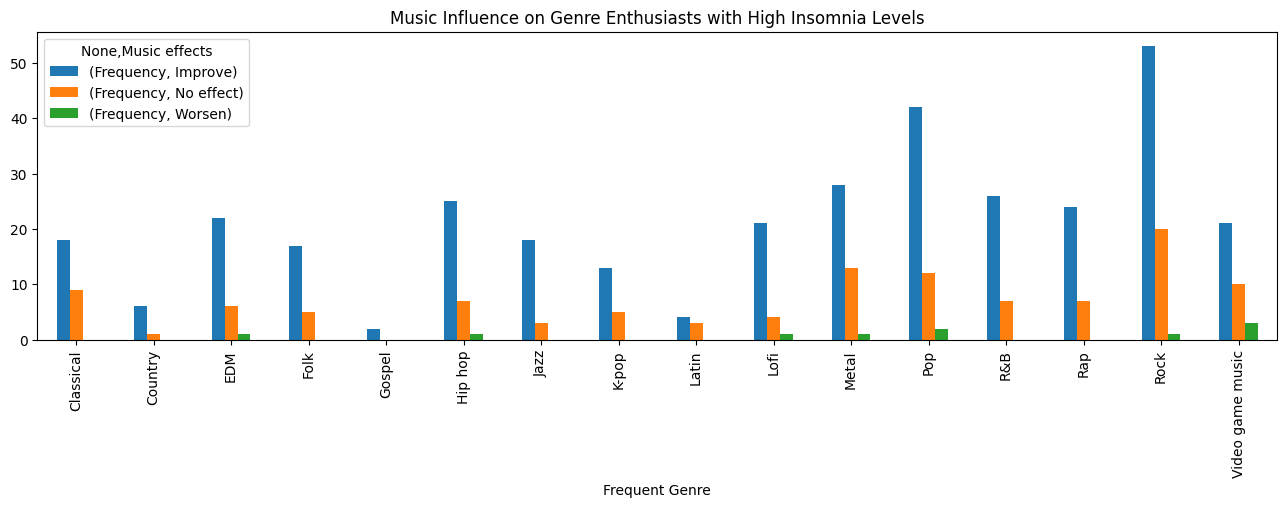

In [160]:
subset_insomnia_df = mapped_df[(mapped_df['Insomnia']>=7) & (mapped_df['Frequency']>=3)]

subset_insomnia_genre_df = subset_insomnia_df[['Music effects', 'Frequent Genre', 'Frequency']]

insomnia_genre_pivoted_df = pd.pivot_table(subset_insomnia_genre_df, index='Frequent Genre', columns='Music effects', aggfunc='count')

insomnia_genre_pivoted_df.plot(figsize=figsize1_2, kind='bar')
plt.title("Music Influence on Genre Enthusiasts with High Insomnia Levels")

Text(0.5, 1.0, 'Music Influence on Genre Enthusiasts with High OCD Levels')

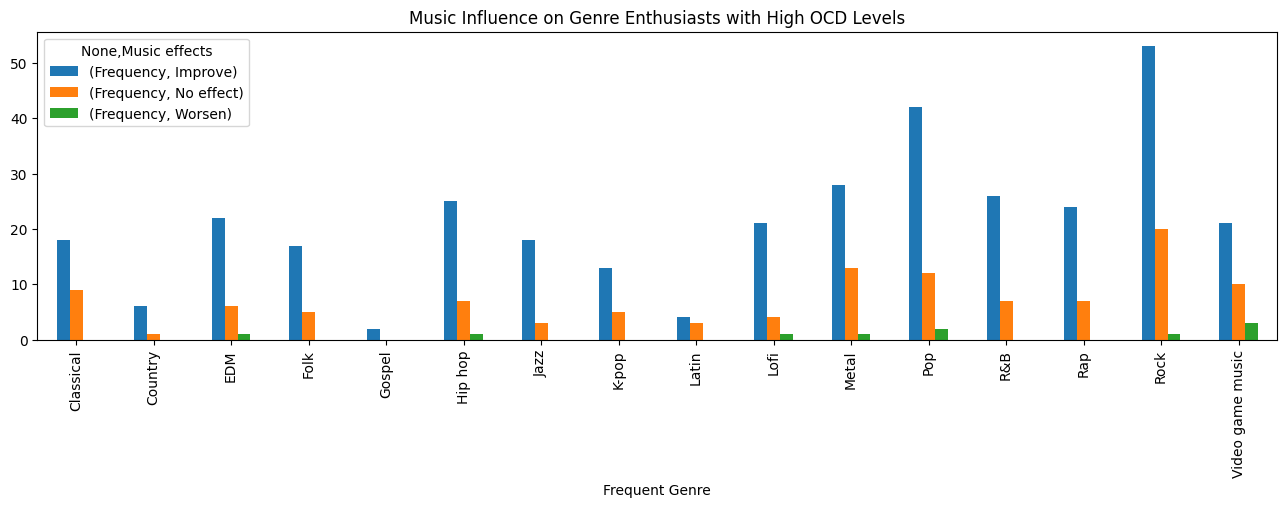

In [161]:
subset_ocd_df = mapped_df[(mapped_df['OCD']>=7) & (mapped_df['Frequency']>=3)]

subset_ocd_genre_df = subset_ocd_df[['Music effects', 'Frequent Genre', 'Frequency']]

ocd_genre_pivoted_df = pd.pivot_table(subset_insomnia_genre_df, index='Frequent Genre', columns='Music effects', aggfunc='count')

ocd_genre_pivoted_df.plot(figsize=figsize1_2, kind='bar')
plt.title("Music Influence on Genre Enthusiasts with High OCD Levels")

In [201]:
# Again, only get very frequented genres
subset_genre_condition = mapped_df[mapped_df['Frequency']>=3]

# Melt to put 'Condition', 'Condition Rating' into 2 columns only (instead of 4+1)
subset_genre_condition = pd.melt(subset_genre_condition, id_vars=['Music effects', 'Frequent Genre'], value_vars = ['Anxiety', 'Depression', 'OCD', 'Insomnia'], var_name='Condition', value_name='Condition Rating', ignore_index=False)

# Subset to only intense experiences. This subsetting was performed later because melting changes the positions of the values of each condition. 
subset_genre_condition = subset_genre_condition[(subset_genre_condition['Condition Rating']>=7)]

subset_genre_condition.drop(columns=['Condition Rating'], inplace=True)
subset_genre_condition

,Music effects,Frequent Genre,Condition
36,Improve,Classical,Anxiety
41,No effect,Classical,Anxiety
175,Improve,Classical,Anxiety
181,Improve,Classical,Anxiety
227,Improve,Classical,Anxiety
...,...,...,...
583,No effect,Video game music,Insomnia
614,Improve,Video game music,Insomnia
640,Improve,Video game music,Insomnia
665,No effect,Video game music,Insomnia


In [249]:
renamed_genre_list = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K-pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']
def tally_cond_effect_genre(condition):

    """Tally the occurrences of 'Frequent Genre' for each 'Music effects'
    under a specific condition.

    This function calculates the count of occurrences of each combination of
    'Music effects' and 'Frequent Genre' for a given condition in the dataset.

    Parameters:
    condition (str): The condition for which the occurrences are tallied.
    This should be one of the conditions present in the dataset.

    Returns:
    pandas.DataFrame: A DataFrame containing the tally of occurrences of
    each 'Frequent Genre' for every 'Music effects' under the specified
    condition. The DataFrame has 'Music effects' as index and 'Frequent Genre'
    as columns, with the count of occurrences as values.
    """
        
    # Only get one of the four conditions
    cond_effect_genre = subset_genre_condition[subset_genre_condition['Condition']==condition]
    cond_effect_genre_dropped = cond_effect_genre.drop(columns='Condition')

    # Count individually by 'Music effects' and 'Frequent Genre'
    cond_effect_genre_dropped.fillna(0, inplace=True)
    cond_effect_genre_counts = cond_effect_genre_dropped.groupby(['Music effects', 'Frequent Genre']).size().reset_index(name='Count')

    # Then pivot the table to display 'Count'
    cond_effect_genre_tally = cond_effect_genre_counts.pivot_table(index='Music effects', columns='Frequent Genre', values='Count', fill_value=0)
    cond_effect_genre_tally = cond_effect_genre_tally.reindex(columns=renamed_genre_list, fill_value=0)
    
    return cond_effect_genre_tally


Text(170.72222222222223, 0.5, 'High OCD levels')

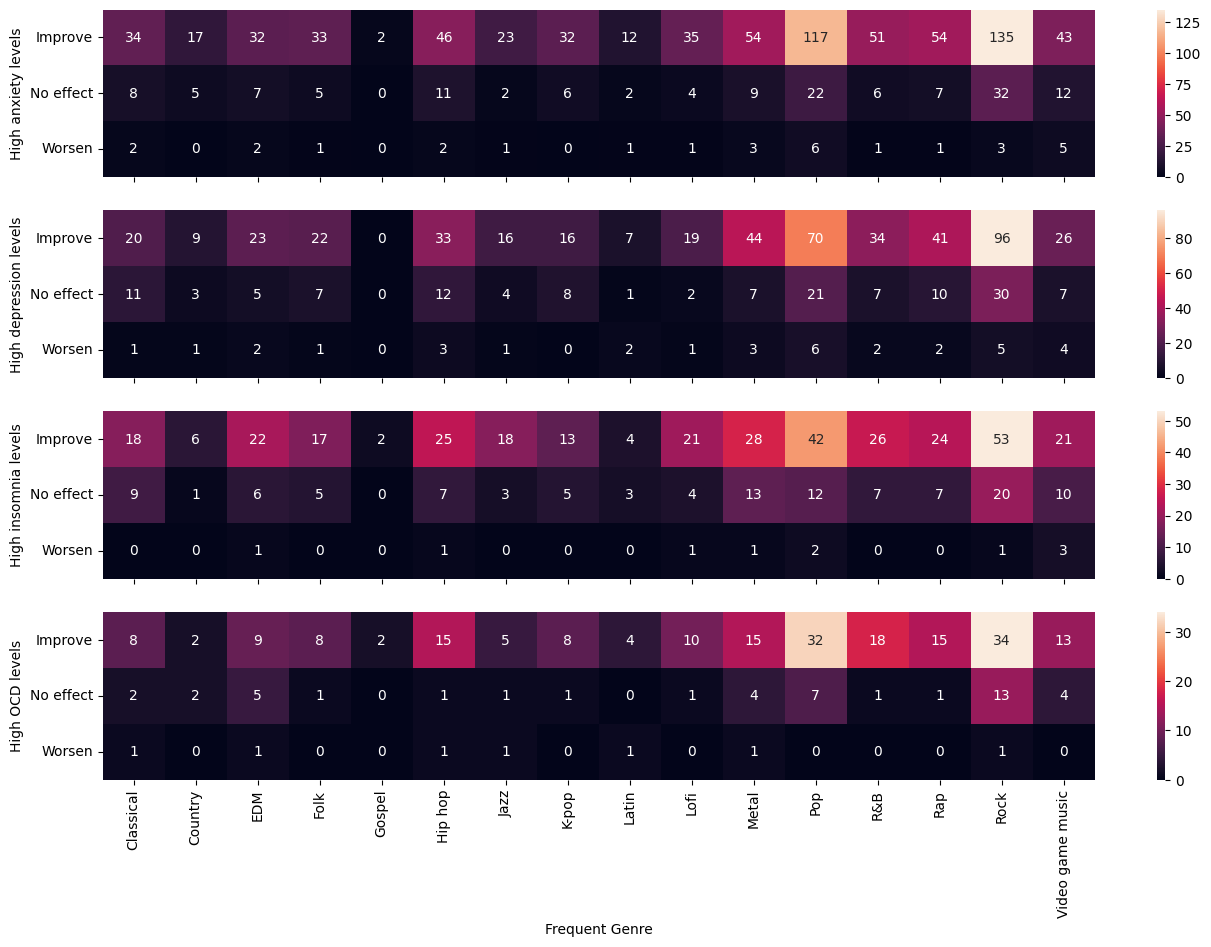

In [255]:
fig, axs = plt.subplots(4, 1, figsize=(16,10), sharex=True)
axs = axs.flatten()

anxeffect_genre_tally = tally_cond_effect_genre('Anxiety')
depeffect_genre_tally = tally_cond_effect_genre('Depression')
inseffect_genre_tally = tally_cond_effect_genre('Insomnia')
ocdeffect_genre_tally = tally_cond_effect_genre('OCD')

sns.heatmap(anxeffect_genre_tally, annot=True, fmt='.3g', ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('High anxiety levels')

sns.heatmap(depeffect_genre_tally, annot=True, fmt='.3g', ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('High depression levels')

sns.heatmap(inseffect_genre_tally, annot=True, fmt='.3g', ax=axs[2])
axs[2].set_xlabel('')
axs[2].set_ylabel('High insomnia levels')

sns.heatmap(ocdeffect_genre_tally, annot=True, fmt='.3g', ax=axs[3])
axs[3].set_ylabel('High OCD levels')
